In [1]:
import os

import click
import numpy as np
import simulator
from networks import DentateGyrus
from scipy import stats  # type: ignore
from spikes import inhomogeneous_poisson_process
from neuron import gui
from recorders import VoltageRecorder, ActionPotentialRecorder

In [2]:
simulator.setup(seed=3)

DG = DentateGyrus()

n_connection_patterns = 24

In [3]:
temporal_patterns = [(inhomogeneous_poisson_process(t_start=0, t_stop=0.5, sampling_interval=0.001, rate_profile_frequency=10, rate_profile_amplitude=110) * 1000).round(1) for _ in range(n_connection_patterns)]

24 28 [ 29.9  31.7  46.7  66.9  86.1 133.9 143.3 146.6 156.3 159.2 179.1 179.6
 265.7 278.2 313.4 333.7 342.1 353.4 355.  356.6 358.9 378.3 407.3 418.9
 421.7 444.7 456.9 460.7]


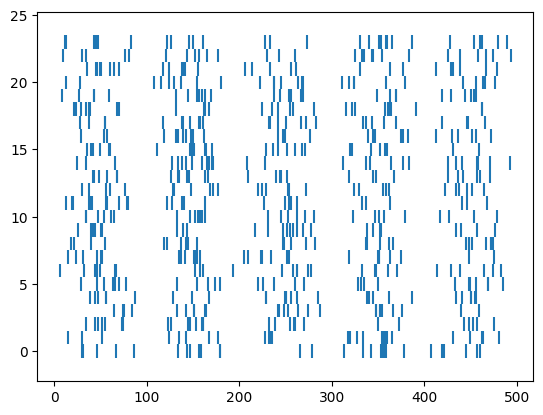

In [4]:
import matplotlib.pyplot as plt

print(len(temporal_patterns), len(temporal_patterns[0]), temporal_patterns[0])
plt.eventplot(temporal_patterns);

In [5]:
n_cells = len(DG.GCs.cells)
pdf = stats.norm.pdf(np.arange(n_cells), loc=n_cells/2, scale=n_cells/2)
pdf /= pdf.sum() # type: ignore

indeces = np.arange(n_cells)
centers = np.random.randint(0, n_cells, size=n_connection_patterns)

for i, center in enumerate(centers):
    relative = np.roll(indeces, -center)
    spatial_pattern = np.random.choice(relative, size=100, p=pdf, replace=False)
    DG.evoke_GC(temporal_patterns[i].tolist(), spatial_pattern.tolist(), weight=0.001)

In [6]:
n_cells = len(DG.BCs.cells)
pdf = stats.norm.pdf(np.arange(n_cells), loc=n_cells/2, scale=n_cells/2)
pdf /= pdf.sum() # type: ignore

indeces = np.arange(n_cells)
# centers = np.random.randint(0, n_cells, size=n_connection_patterns)
centers = (centers / len(DG.GCs.cells) * len(DG.BCs.cells)).astype(int)

for i, center in enumerate(centers):
    relative = np.roll(indeces, -center)
    spatial_pattern = np.random.choice(relative, size=1, p=pdf, replace=False)
    DG.evoke_BC(temporal_patterns[i].tolist(), spatial_pattern.tolist(), weight=0.001)

In [7]:
apr = ActionPotentialRecorder(DG)
vr = VoltageRecorder(DG)

In [8]:
simulator.run(warmup=200, duration=50)

In [9]:
len(apr.records_by_population_id[DG.MCs.id][0])

0

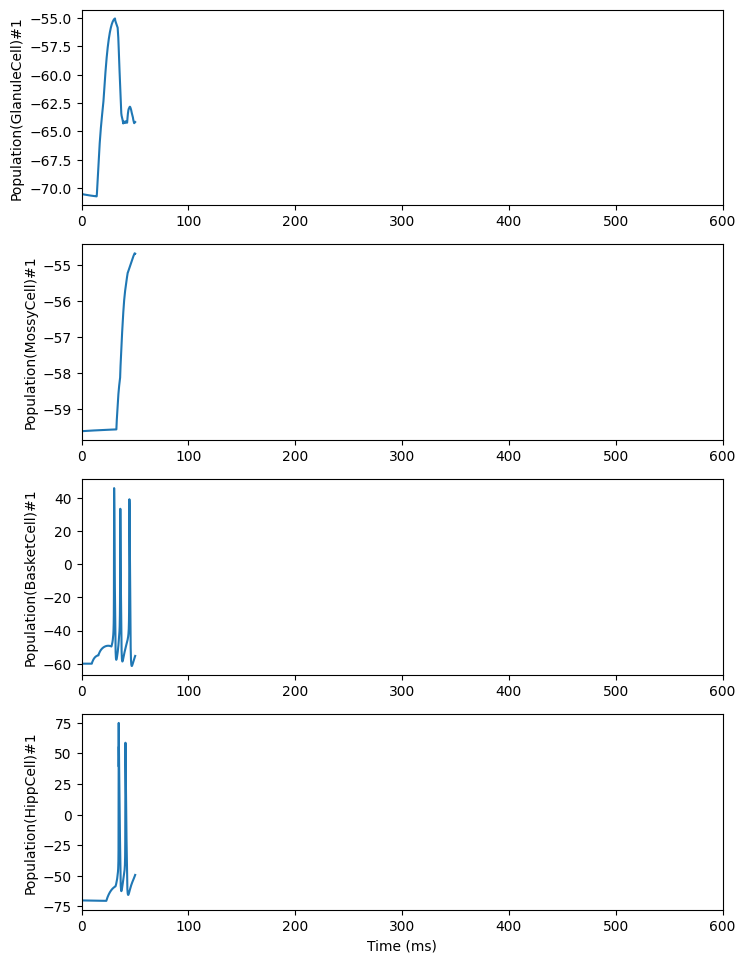

In [10]:
fig1 = vr.plot()

In [11]:
records = apr.records_by_population_id[DG.MCs.id]

def calc_active_cell_percentage(records: list):
        n_active_cells = 0
        for record in records:
            if len(record) > 0:
                n_active_cells += 1
        
        return n_active_cells / len(records) * 100

calc_active_cell_percentage(records)

30.0

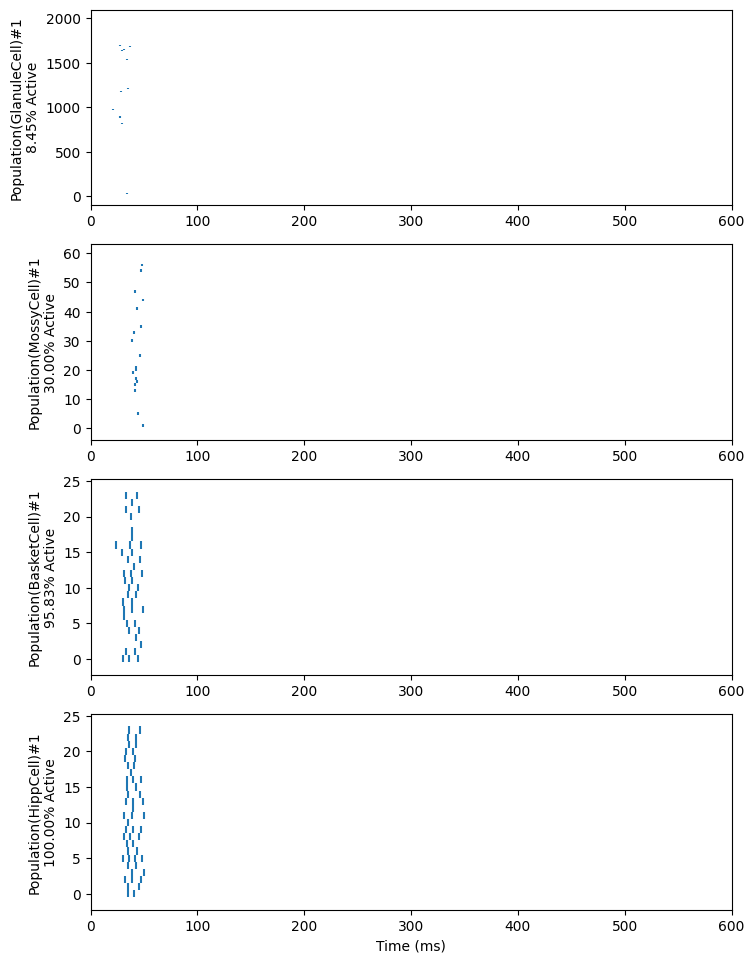

In [12]:
fig = apr.plot()